In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# # Use the tuple() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

647

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
city_url = url 
print(city_url)
# Import the datetime module from the datetime library.
from datetime import datetime


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3917c8e40ad06b07551934e55efc7936
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3917c8e40ad06b07551934e55efc7936


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | wiwili
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | olafsvik
Processing Record 7 of Set 1 | el prat de llobregat
Processing Record 8 of Set 1 | chapayevka
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | mamallapuram
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | komsomolskiy
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | goderich
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | ascension
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | kuvshinovo
Processing Record 23 

Processing Record 38 of Set 4 | ugoofaaru
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | villanueva de la serena
Processing Record 42 of Set 4 | okhotsk
Processing Record 43 of Set 4 | kodinsk
Processing Record 44 of Set 4 | bilma
Processing Record 45 of Set 4 | yerbogachen
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | cherdyn
Processing Record 49 of Set 4 | khonuu
City not found. Skipping...
Processing Record 50 of Set 4 | axim
Processing Record 1 of Set 5 | illapel
Processing Record 2 of Set 5 | karratha
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | mayo
Processing Record 5 of Set 5 | pucallpa
Processing Record 6 of Set 5 | centralia
Processing Record 7 of Set 5 | noumea
Processing Record 8 of Set 5 | upernavik
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 | viligili
City not found. Skipping...


Processing Record 26 of Set 8 | sibu
Processing Record 27 of Set 8 | berdigestyakh
Processing Record 28 of Set 8 | sherlovaya gora
Processing Record 29 of Set 8 | la garriga
Processing Record 30 of Set 8 | syracuse
Processing Record 31 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 32 of Set 8 | paradwip
City not found. Skipping...
Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | balikpapan
Processing Record 35 of Set 8 | lao cai
Processing Record 36 of Set 8 | acapulco
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | tumaco
Processing Record 39 of Set 8 | bossier city
Processing Record 40 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 41 of Set 8 | correntina
Processing Record 42 of Set 8 | ampanihy
Processing Record 43 of Set 8 | chardara
Processing Record 44 of Set 8 | sulangan
Processing Record 45 of Set 8 | manta
Processing Record 46 of Set 8 | kalamnuri
Processing Record 47 of Set

Processing Record 12 of Set 12 | kosh-agach
Processing Record 13 of Set 12 | hirado
Processing Record 14 of Set 12 | tommot
Processing Record 15 of Set 12 | santa cruz
Processing Record 16 of Set 12 | hambantota
Processing Record 17 of Set 12 | la ronge
Processing Record 18 of Set 12 | santiago del estero
Processing Record 19 of Set 12 | rocha
Processing Record 20 of Set 12 | sao caitano
Processing Record 21 of Set 12 | cairns
Processing Record 22 of Set 12 | severomuysk
Processing Record 23 of Set 12 | ouallam
Processing Record 24 of Set 12 | severnoye
Processing Record 25 of Set 12 | cao bang
Processing Record 26 of Set 12 | evensk
Processing Record 27 of Set 12 | husavik
Processing Record 28 of Set 12 | talnakh
Processing Record 29 of Set 12 | balaipungut
Processing Record 30 of Set 12 | maposeni
Processing Record 31 of Set 12 | makakilo city
Processing Record 32 of Set 12 | lieksa
Processing Record 33 of Set 12 | hinton
Processing Record 34 of Set 12 | kalispell
Processing Record 3

In [11]:
len(city_data)


592

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.33,75,100,15.57,PF,2021-10-26 13:17:05
1,Victoria,22.2855,114.1577,79.32,78,89,1.99,HK,2021-10-26 13:12:53
2,Wiwili,13.6268,-85.8254,81.34,95,76,1.14,NI,2021-10-26 13:17:14
3,Ostrovnoy,68.0531,39.5131,28.27,83,100,7.61,RU,2021-10-26 13:17:14
4,Punta Arenas,-53.1500,-70.9167,46.51,76,0,21.85,CL,2021-10-26 13:17:15
5,Olafsvik,64.8945,-23.7142,40.33,77,100,23.06,IS,2021-10-26 13:17:15
6,El Prat De Llobregat,41.3278,2.0947,75.61,62,20,12.66,ES,2021-10-26 13:17:16
7,Chapayevka,47.4711,36.3451,49.08,24,2,5.39,UA,2021-10-26 13:17:16
8,Cherskiy,68.7500,161.3000,-18.81,100,95,4.65,RU,2021-10-26 13:17:17
9,Cayenne,4.9333,-52.3333,86.04,82,75,3.00,GF,2021-10-26 13:16:06


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-10-26 13:17:05,-23.1203,-134.9692,75.33,75,100,15.57
1,Victoria,HK,2021-10-26 13:12:53,22.2855,114.1577,79.32,78,89,1.99
2,Wiwili,NI,2021-10-26 13:17:14,13.6268,-85.8254,81.34,95,76,1.14
3,Ostrovnoy,RU,2021-10-26 13:17:14,68.0531,39.5131,28.27,83,100,7.61
4,Punta Arenas,CL,2021-10-26 13:17:15,-53.1500,-70.9167,46.51,76,0,21.85
5,Olafsvik,IS,2021-10-26 13:17:15,64.8945,-23.7142,40.33,77,100,23.06
6,El Prat De Llobregat,ES,2021-10-26 13:17:16,41.3278,2.0947,75.61,62,20,12.66
7,Chapayevka,UA,2021-10-26 13:17:16,47.4711,36.3451,49.08,24,2,5.39
8,Cherskiy,RU,2021-10-26 13:17:17,68.7500,161.3000,-18.81,100,95,4.65
9,Cayenne,GF,2021-10-26 13:16:06,4.9333,-52.3333,86.04,82,75,3.00


In [17]:
# # Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
# # Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635254735.320999

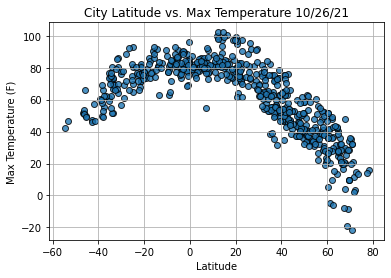

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

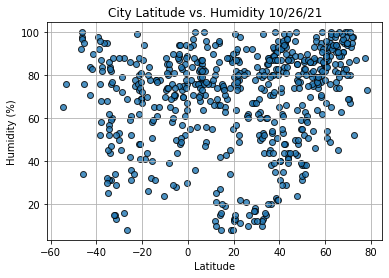

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

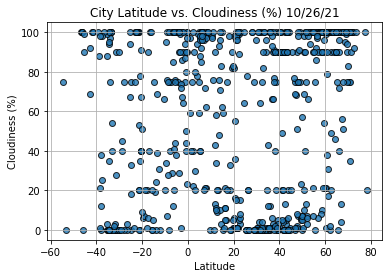

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

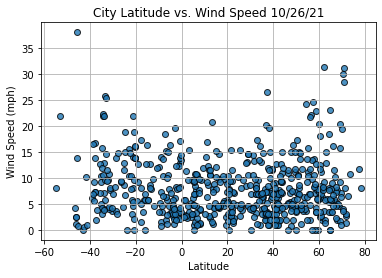

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()